# Changing Rates

It is not always the case that we have a constant rate applied. Sometimes we may deal with multiple rates, and for this case we will introduce two ways to find the total return at each point in time.

### Using a Loop

Let's begin with a value of $100 and say that the first 15 years have a rate of 10% while the last 15 years have a rate of 2%. First, create the rates list, then we can simply iterate through each yearly return!

In [1]:
#Create the rates
rates = [.1]*15+[.02]*15
print(rates)

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]


In [2]:
#Also a list describing the years we will represent
years = list(range(31))

In [3]:
#Start with the principal at time 0
A = 100
A_list = [A]

#Go through the rates and update the value for each year
for r in rates:
    A = (1 + r) * A
    A_list.append(A)
print(A_list)

[100, 110.00000000000001, 121.00000000000003, 133.10000000000005, 146.41000000000008, 161.0510000000001, 177.15610000000012, 194.87171000000015, 214.3588810000002, 235.79476910000022, 259.37424601000026, 285.3116706110003, 313.84283767210036, 345.2271214393104, 379.74983358324147, 417.7248169415656, 426.07931328039695, 434.6008995460049, 443.29291753692496, 452.15877588766347, 461.20195140541676, 470.4259904335251, 479.8345102421956, 489.43120044703954, 499.21982445598036, 509.20422094509996, 519.388305364002, 529.7760714712821, 540.3715929007077, 551.1790247587219, 562.2026052538963]


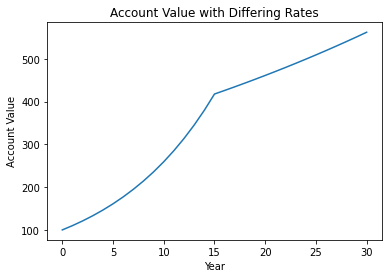

In [4]:
import matplotlib.pyplot as plt

#Plot the compound interest
plt.plot(years, A_list)
plt.xlabel("Year")
plt.ylabel("Account Value")
plt.title("Account Value with Differing Rates")
plt.show()

## Using the cumprod function 

One of the functions that can make this process very easy is the cumprod function from numpy. For a list of values, it returns the multiplication of all values up to and including that value. So the formula for the ith value is:

$ Y_{i} = X_{0} * X_{1} * .... X_{i}$

For finding the value for the rates, we can add 1 to each and then use this function on it. Look below for the example.

In [5]:
import numpy as np

#Turn the rates into a numpy array
rates = np.array(rates)

#Add 1 to each rate
rates = rates + 1

#Find the cummulative product
cummulative_product = np.cumprod(rates)
print(cummulative_product)

[1.1        1.21       1.331      1.4641     1.61051    1.771561
 1.9487171  2.14358881 2.35794769 2.59374246 2.85311671 3.13842838
 3.45227121 3.79749834 4.17724817 4.26079313 4.346009   4.43292918
 4.52158776 4.61201951 4.7042599  4.7983451  4.894312   4.99219824
 5.09204221 5.19388305 5.29776071 5.40371593 5.51179025 5.62202605]


For this array, we also are going to need the value 1 in the beginning to represent the principal at time 0. The insert function from numpy takes an array, the index to insert at, and the value to insert then returns this new array.

In [6]:
#We also want to insert the value 1 in the beginning
cummulative_product = np.insert(cummulative_product, 0, 1)
print(cummulative_product)

[1.         1.1        1.21       1.331      1.4641     1.61051
 1.771561   1.9487171  2.14358881 2.35794769 2.59374246 2.85311671
 3.13842838 3.45227121 3.79749834 4.17724817 4.26079313 4.346009
 4.43292918 4.52158776 4.61201951 4.7042599  4.7983451  4.894312
 4.99219824 5.09204221 5.19388305 5.29776071 5.40371593 5.51179025
 5.62202605]


Now that we have the cummulative product we can multiply the principal in to find the account value at each point. It will match our results from using the loop.

In [7]:
#Multiply in the value of principal
A_list = cummulative_product * 100
print(A_list)

[100.         110.         121.         133.1        146.41
 161.051      177.1561     194.87171    214.358881   235.7947691
 259.37424601 285.31167061 313.84283767 345.22712144 379.74983358
 417.72481694 426.07931328 434.60089955 443.29291754 452.15877589
 461.20195141 470.42599043 479.83451024 489.43120045 499.21982446
 509.20422095 519.38830536 529.77607147 540.3715929  551.17902476
 562.20260525]


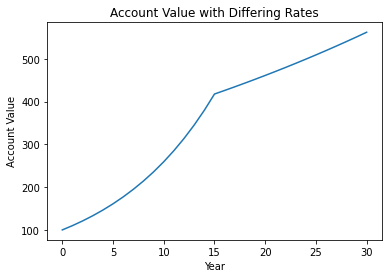

In [8]:
#Plot the results again
plt.plot(years, A_list)
plt.xlabel("Year")
plt.ylabel("Account Value")
plt.title("Account Value with Differing Rates")
plt.show()

One thing you will notice is that if we have the same rates applied but in different order, our ending account value will still be the same. Let's try it now.

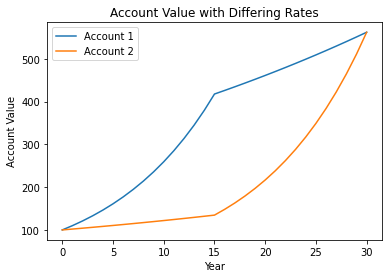

In [9]:
#Find the rates
rates1 = [.1]*15 + [.02]*15
rates2 = [.02]*15 + [.1]*15

#Convert the rates to numpy arrays
rates1 = np.array(rates1)
rates2 = np.array(rates2)

#Add 1 to the rates
rates1 = rates1 + 1
rates2 = rates2 + 1

#Find the cummulative product
cummulative_product1 = np.cumprod(rates1)
cummulative_product2 = np.cumprod(rates2)

#Insert the value of 1 in both of the arrays
cummulative_product1 = np.insert(cummulative_product1, 0, 1)
cummulative_product2 = np.insert(cummulative_product2, 0, 1)

#Find the account values
A_list1 = cummulative_product1 * 100
A_list2 = cummulative_product2 * 100

#Plot the values
plt.plot(years, A_list1)
plt.plot(years, A_list2)
plt.xlabel("Year")
plt.ylabel("Account Value")
plt.title("Account Value with Differing Rates")
plt.legend(['Account 1', 'Account 2'])
plt.show()

## The Effect of Withdrawal

If there are withdrawals the effects may become interesting. In the case that withdrawls outpace the interest earned, we may eventually get to the point where there is no money left.

In [10]:
def compound_interest_withdrawal(P, rates, withdrawal):
    A = P
    A_list = [A]
    for r in rates:
        #Accrue the interest
        A = (1 + r) * A
        
        #Withdraw the cash, but only if there is enough
        A = max(A - withdrawal, 0)
        A_list.append(A)
    return A_list
rates = [.02] * 30
A_list = compound_interest_withdrawal(100000, rates, 7000)
print(A_list)

[100000, 95000.0, 89900.0, 84698.0, 79391.96, 73979.79920000001, 68459.39518400001, 62828.58308768, 57085.154749433605, 51226.85784442228, 45251.395001310724, 39156.42290133694, 32939.55135936368, 26598.342386550954, 20130.309234281973, 13532.915418967612, 6803.573727346964, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


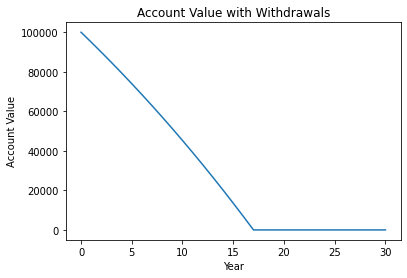

In [11]:
plt.plot(years, A_list)
plt.xlabel("Year")
plt.ylabel("Account Value")
plt.title("Account Value with Withdrawals")
plt.show()

In [12]:
rates_l = [[.02] * 30,
          [.07] * 30,
          [.09] * 30]
A_list = []
for rates in rates_l:
    A_list.append(compound_interest_withdrawal(100000, rates, 7000))
print(A_list)

[[100000, 95000.0, 89900.0, 84698.0, 79391.96, 73979.79920000001, 68459.39518400001, 62828.58308768, 57085.154749433605, 51226.85784442228, 45251.395001310724, 39156.42290133694, 32939.55135936368, 26598.342386550954, 20130.309234281973, 13532.915418967612, 6803.573727346964, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [100000, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0], [100000, 102000.00000000001, 104180.00000000003, 106556.20000000004, 109146.25800000006, 111969.42122000008, 115046.6691298001, 118400.8693514821, 122056.9475931155, 126042.07287649592, 130385.85943538055, 135120.5867845648, 140281.43959517565, 145906.76915874146, 152038.3783830282, 158721.83243750077, 166006.79735687585, 173947.4091189947, 182602.67593970423, 192036.

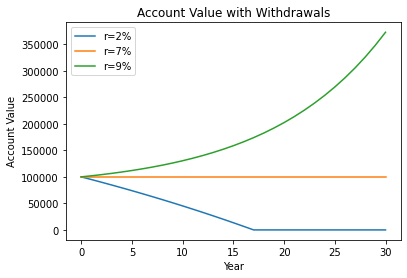

In [13]:
plt.plot(years, A_list[0])
plt.plot(years, A_list[1])
plt.plot(years, A_list[2])
plt.xlabel("Year")
plt.ylabel("Account Value")
plt.title("Account Value with Withdrawals")
plt.legend(["r=2%", "r=7%", "r=9%"])
plt.show()

## The Importance of Timing

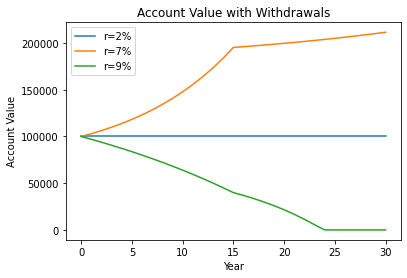

In [14]:
rates_l = [[.07] * 30,
          [.10] * 15 + [.04] * 15,
           [.04] * 15 + [.10] * 15]
A_list = []
for rates in rates_l:
    A_list.append(compound_interest_withdrawal(100000, rates, 7000))
plt.plot(years, A_list[0])
plt.plot(years, A_list[1])
plt.plot(years, A_list[2])
plt.xlabel("Year")
plt.ylabel("Account Value")
plt.title("Account Value with Withdrawals")
plt.legend(["r=2%", "r=7%", "r=9%"])
plt.show()

## Annualize Rates

Not all rates are paid on an annual basis. For example, many times there are semi-annual payments. If there is an 8% rate paid annually then 10% is paid at the end of the year but if it is semi-annual 5% is paid halfway through the year then the next 5% is paid at the end of the year. Let's see how it might look if we compounded based on the half years.

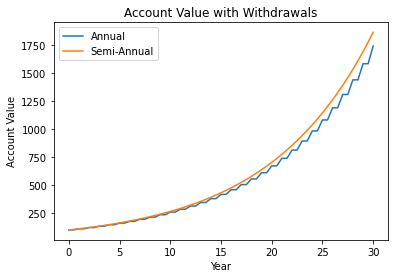

In [15]:
years = [x/2 for x in range(61)]

#Annual is paid only every other half year
annual_r = [0, .1] * 30

#Semi-annual would be paid every period but with half the rate is
semiannual_r = [0.05, 0.05] * 30

#Convert the rates to numpy arrays
annual_r = np.array(annual_r)
semiannual_r = np.array(semiannual_r)

#Add 1 to the rates and find the cummulative product
cummulative_product1 = np.cumprod(annual_r + 1)
cummulative_product2 = np.cumprod(semiannual_r + 1)

#Insert the value of 1 in both of the arrays
cummulative_product1 = np.insert(cummulative_product1, 0, 1)
cummulative_product2 = np.insert(cummulative_product2, 0, 1)

#Find the account values
A_list1 = cummulative_product1 * 100
A_list2 = cummulative_product2 * 100

plt.plot(years, A_list1)
plt.plot(years, A_list2)
plt.xlabel("Year")
plt.ylabel("Account Value")
plt.title("Account Value with Withdrawals")
plt.legend(["Annual", "Semi-Annual"])
plt.show()

Obviously there is a benefit to more frequent compounding. The formula to find the equivalent or annualized formula is:

$ r_{effective} = (1 + \frac{r_{nominal}}{n}) ^ n -1 $

where

$ r_{nominal} = \text{Nominal rate of return} $

$ r_{effective} = \text{Effective rate of return} $

$ n = \text{Frequency of compounding} $

There is also the possibility of continuously compounded return (one in which every second there is compounding applied). This type of compounding given the same nominal rate will yield the highest effective rate. The formula for this case is:

$ r_{effective} = e^{r_{nominal}t}-1 $

where

$ r_{nominal} = \text{The nominal rate of return} $

$ r_{effective} = \text{The effective rate of return} $

In [16]:
#Let's compare returns that are compounded annually, semi-annually, quarterly, monthly, and continuously.
annual = .08
semiannual = (1 + .08/2) ** 2 - 1
quarterly = (1 + .08/4) ** 4 - 1
monthly = (1 + .08/12) ** 12 - 1
continuous = np.exp(.08 * 1) - 1

print("Annual: {}".format(annual))
print("Semi-annual: {}".format(semiannual))
print("Quarterly: {}".format(quarterly))
print("Monthly: {}".format(monthly))
print("Continuous: {}".format(continuous))

Annual: 0.08
Semi-annual: 0.08160000000000012
Quarterly: 0.08243215999999998
Monthly: 0.08299950680750978
Continuous: 0.08328706767495864


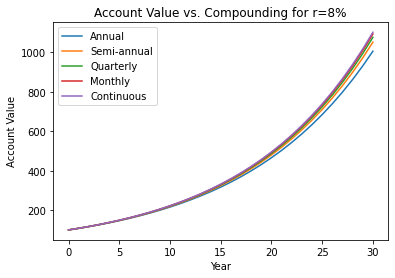

In [17]:
#And what about the effect over 30 years
years = list(range(31))
rates = [np.array([r]*30) + 1 for r in [annual, semiannual, quarterly, monthly, continuous]]
A_list = [np.cumprod(r) * 100 for r in rates]
A_list = [np.insert(A, 0, 100) for A in A_list]

for A in A_list:
    plt.plot(years, A)
plt.xlabel("Year")
plt.ylabel("Account Value")
plt.title("Account Value vs. Compounding for r=8%")
plt.legend(["Annual", "Semi-annual", "Quarterly", "Monthly", "Continuous"])
plt.show()

In [18]:
#Look at the difference at the end of the 30 years between the value of a continuously compounded rate and annual one
print(A_list[-1][-1] - A_list[0][-1])

96.05194915681807


## Solving Other Parts of the Equation

Besides finding the future value, we could find other variables. What about finding the number of years it would take for a principal amount to become a certain value. If the equation is:

$ A = P * (1+r)^t $

where

$ A = \text{The account value}$

$ r = \text{The effective annual rate}$

$ t = \text{The number of years}$

It can be re-arranged to find t by taking the log of both sides first, then dividing over.

$ log(\frac{A}{P}) = log((1+r)^t) $

$ log(\frac{A}{P}) = t * log(1+r) $

$ \frac{log(\frac{A}{P})}{log(1+r)} = t $

In [19]:
#With a 5% rate, a future account value of $200, and a starting value of 100, how many years would it take
A = 200
P = 100
r = .05

#Find the number of years
t = np.log(A/P) / np.log(1+r)
print(t)
print()

#Check it is correct
print(P * (1+r) ** t)

14.206699082890461

200.0


What if we want to know the rate that would be needed. We can re-arrange to get:

$ \frac{A}{P} =(1+r)^t $

$ (\frac{A}{P})^{\frac{1}{t}} =1+r $

$ (\frac{A}{P})^{\frac{1}{t}} - 1 =r $


In [20]:
#What if the account value is 200 after starting at 100 just 10 years older
A = 200
P = 100
t = 10

r = (A / P) ** (1/t) - 1
print(r)
print()

#Check if it is correct
print(P * (1+r) ** t)

0.07177346253629313

199.99999999999994


Finally what about the starting value which would get us to a final account value given a number of years, a rate and that ending value.

$ \frac{A}{(1+r)^t} = P $

In [21]:
#What about $200 in the future, with 10 years of compounding at a 5% rate
A = 200
t = 10
r = .05

P = A / (1+r) ** t
print(P)
print()

#Check if it is correct
print(P * (1+r) ** t)

122.78265070815183

200.0
